In [50]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd                  #data processing e.g. reading files (pd.read_csv)
import numpy as np                   #linear algebra
import matplotlib.pyplot as plt      #plotting and visualization
import seaborn as sns                #visualization
import nltk
from nltk.corpus import stopwords
import requests
import warnings
import re 
from textblob import TextBlob 
from collections import Counter
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 8,4


%matplotlib inline

In [2]:
html1 = urlopen("https://www.yelp.com/search?find_desc=Restraunts%20&find_loc=nyc")
bsObj1 = BeautifulSoup(html1)


In [3]:
#Get the Names Gyms
nameList = bsObj1.find_all('div', {'class': 'lemon--div__373c0__1mboc businessName__373c0__1fTgn border-color--default__373c0__2oFDT'})
for name in nameList:
    print(name.get_text())

Sugardaddy’s Gentlemen’s Club
1. Upstate
2. Amélie
3. Covenhoven
4. Uglyduckling
5. Clinton Street Baking Company
6. Barn Joo 35
7. Savida
8. LoveMama
9. Joe’s Shanghai
10. Raku


In [4]:
# Reviews
urls = []
c = 120
for i in range(12): 
    new = "https://www.yelp.com/biz/eleven-madison-park-new-york?start="+str(c)+"&sort_by=date_desc"
    urls.append(new)
    c+=20
Reviews_mad = []
for url in urls:
    html = urlopen(url)
    bsObj4 = BeautifulSoup(html)
   
    reviewers = bsObj4.find_all('div', {'itemprop': 'review'})
    for name in reviewers:
        Reviews_mad.append(name.get_text())

In [7]:
date_mad = []
Ratings_mad = []
for url in urls:
    html = urlopen(url)
    bsObj4 = BeautifulSoup(html)
    for name in bsObj4.find_all('meta', {'itemprop': 'datePublished'}):
        date_mad.append(name.get("content"))
    for reviewBody in bsObj4.findAll('div',{"class":"review-content"}):
        Ratings_mad.append(reviewBody.div.div.div.get("title"))


In [6]:
#ratings 
Ratings_mad = []

for url in urls:
    html = urlopen(url)
    bsObj4 = BeautifulSoup(html)
    for reviewBody in bsObj4.findAll('div',{"class":"review-content"}):
        Ratings_mad.append(reviewBody.div.div.div.get("title"))
       

KeyboardInterrupt: 

In [8]:
print(len(Ratings_mad))

240


In [9]:
print(len(Reviews_mad))

240


In [10]:
print(len(date_mad))

240


In [39]:
yelp_data = pd.DataFrame({'Review': Reviews_mad,'Rating':Ratings_mad, 'Date': date_mad})

In [56]:
yelp_data['Review'] = [i.replace('\n', '') for i in yelp_data['Review']]
yelp_data['Rating'] = [float(re.sub(r'[^\d.]+','', i)) for i in yelp_data['Rating']]
yelp_data["Date"] = [pd.to_datetime(i) for i in yelp_data["Date"]]


In [41]:
yelp_data.to_csv("yelp_data.csv")

In [42]:
#sentiment analysis 
def review_sentiment(review): 
    analysis = TextBlob(review) 
    return analysis.sentiment.polarity

In [43]:
sentiment_list = []
for review in yelp_data['Review']:
    sentiment_list.append(review_sentiment(review))
for sent in sentiment_list:
    yelp_data["Sentiment"] = [i for i in sentiment_list]


In [44]:
yelp_data.head(5)

,Date,Rating,Review,Sentiment
0,2018-11-15,4.0,If second time is the charm then our dinner on...,0.337662
1,2018-11-14,4.0,"Very good. But I guess with all the hype, I w...",0.285833
2,2018-11-14,5.0,This has been on my bucket list for a while bu...,0.108203
3,2018-11-12,5.0,My boyfriend and I had an amazing experience a...,0.110115
4,2018-11-11,5.0,Ok where do I start I think if you reserved th...,0.224017


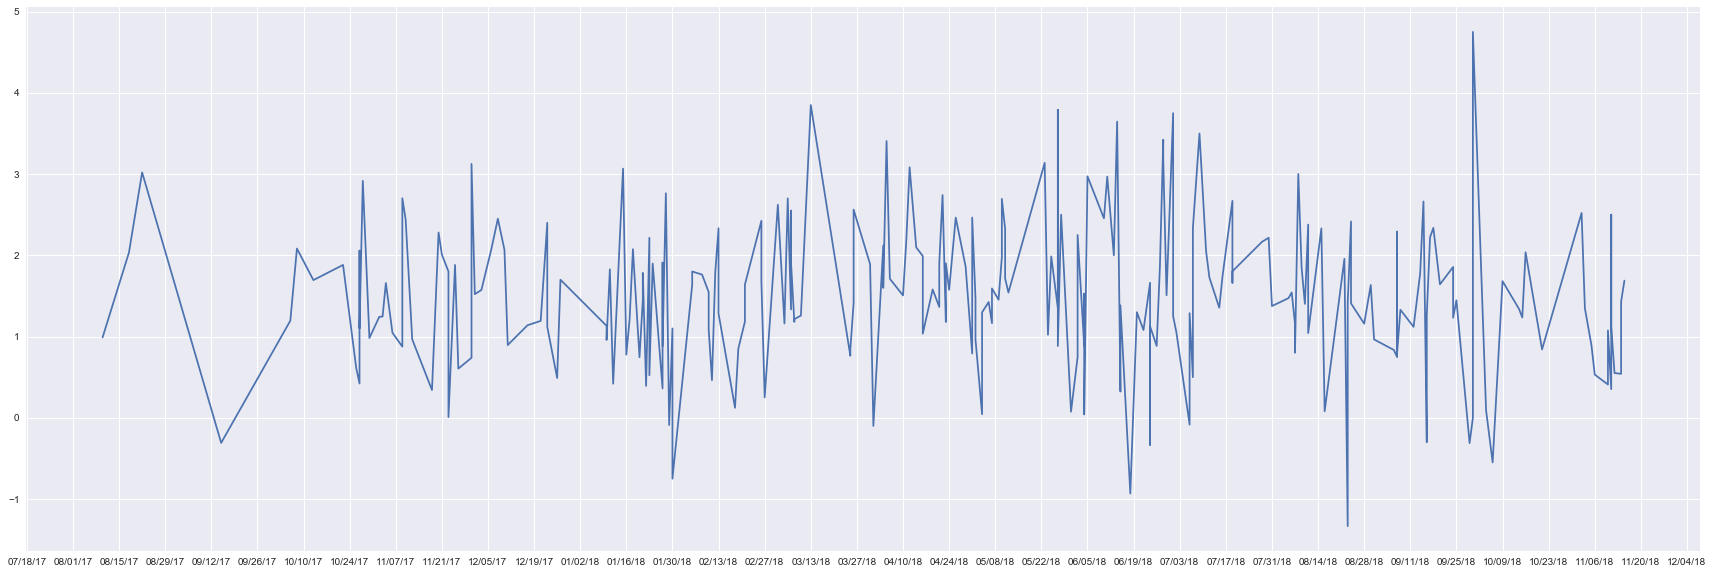

In [78]:
fig, ax = plt.subplots(figsize = (30,10))
plt.plot(yelp_data['Date'],5*yelp_data['Sentiment'])
FMT = DateFormatter("%m/%d") 
ax.xaxis.set_major_formatter(FMT) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator( interval=2))

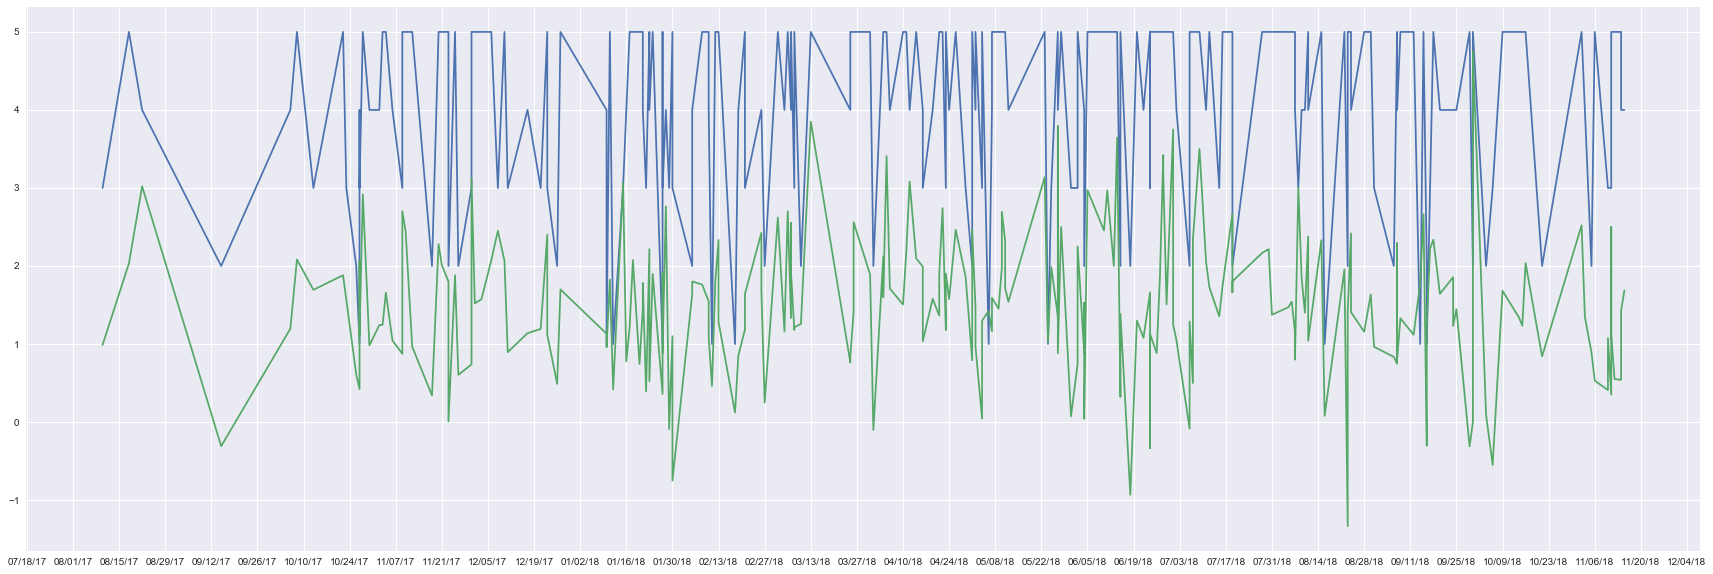

In [86]:
fig, ax = plt.subplots(figsize = (30,10))
plt.plot(yelp_data['Date'],yelp_data['Rating'])
plt.plot(yelp_data['Date'],5*yelp_data['Sentiment'])
FMT = DateFormatter("%m/%d") 
ax.xaxis.set_major_formatter(FMT) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator( interval=2))

In [72]:
groups = yelp_data.groupby(yelp_data['Date'])
yelp_data_ave_date = []
yelp_data_ave_rating = []
for i in yelp_data['Date'].unique():
    yelp_data_ave_date.append(i)
    yelp_data_ave_rating.append(np.mean(groups.get_group(i)['Rating']))

In [70]:
yelp_data_ave = pd.DataFrame({'Date': yelp_data_ave_date,'Average Rating':yelp_data_ave_rating})

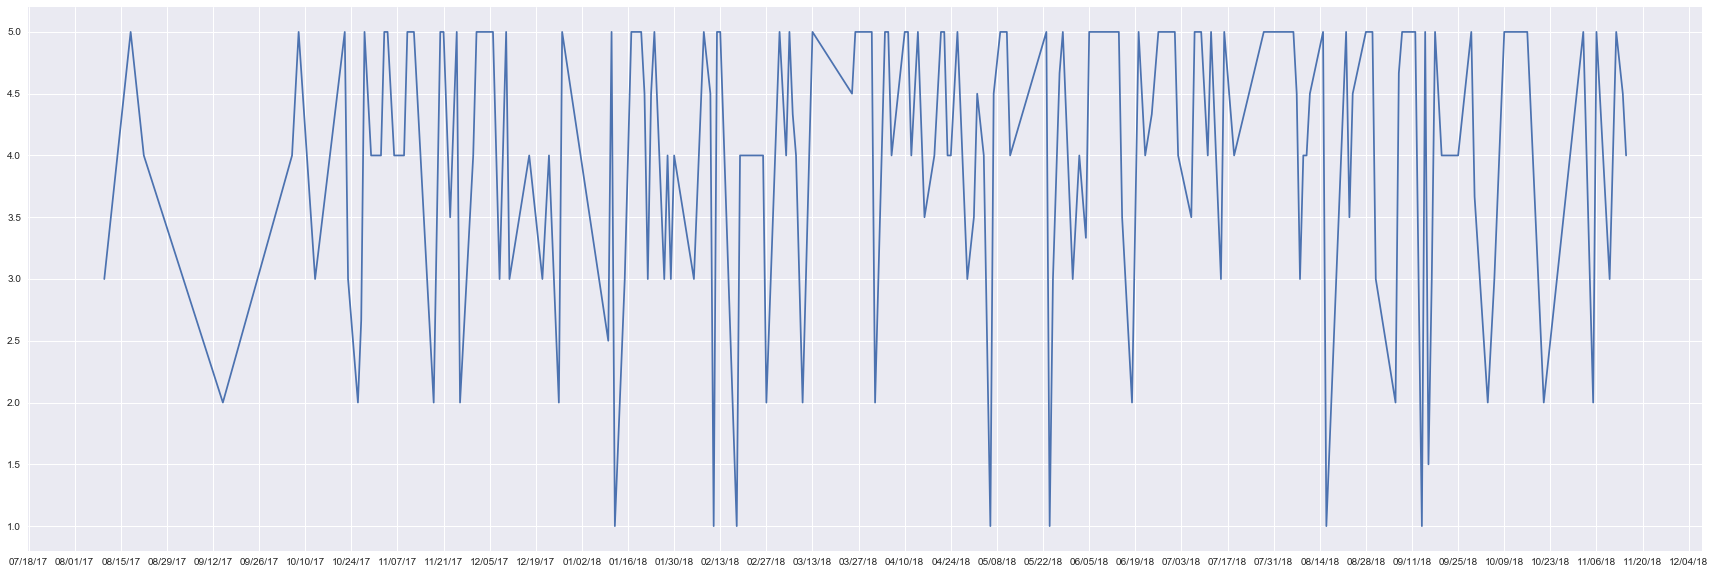

In [71]:
fig, ax = plt.subplots(figsize = (30,10))
plt.plot(yelp_data_ave['Date'],yelp_data_ave['Average Rating'])
FMT = DateFormatter("%m/%d") 
ax.xaxis.set_major_formatter(FMT) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator( interval=2))

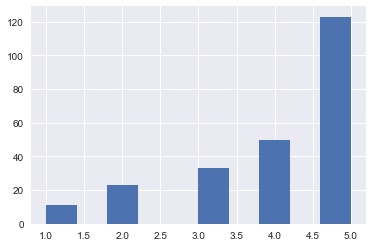

In [74]:
plt.hist(yelp_data['Rating'])
plt.show()

**Weather Data Processing**